# Data gathering

## Imports

In [1]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from matplotlib.ticker import FormatStrFormatter

params = {'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

unfiltered_data = pd.read_table('final_data_updated.csv', delimiter=',')

## Remove corrupted or invalid data

In [2]:
invalid_value_mask = np.equal(unfiltered_data, -1)
invalid_rows_mask = np.any(invalid_value_mask, axis=1)
data = unfiltered_data[~invalid_rows_mask]

## Specific projects

In [3]:
data = data.loc[data['Project'].isin(['Math', 'Time', 'Lang', 'Closure', 'Chart'])]
print(data['Project'].unique())

['Chart' 'Closure' 'Lang' 'Math' 'Time']


## Label & Dataset

In [4]:
# Change here to set another label: L-1, L-3, L-4, L-5, L-5-10, L-10
label = 'L-10'
X = data.filter(regex="(S|D|T|B)-.*")

y = data[label]

# PCA

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# OPTIONS
components = 10

# Standardizing the features
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=components)

principalComponents = pca.fit_transform(X)
X_pca = pd.DataFrame(data = principalComponents, 
                     columns = ["PC" + str(i) for i in range(1,components+1)])

<IPython.core.display.Javascript object>


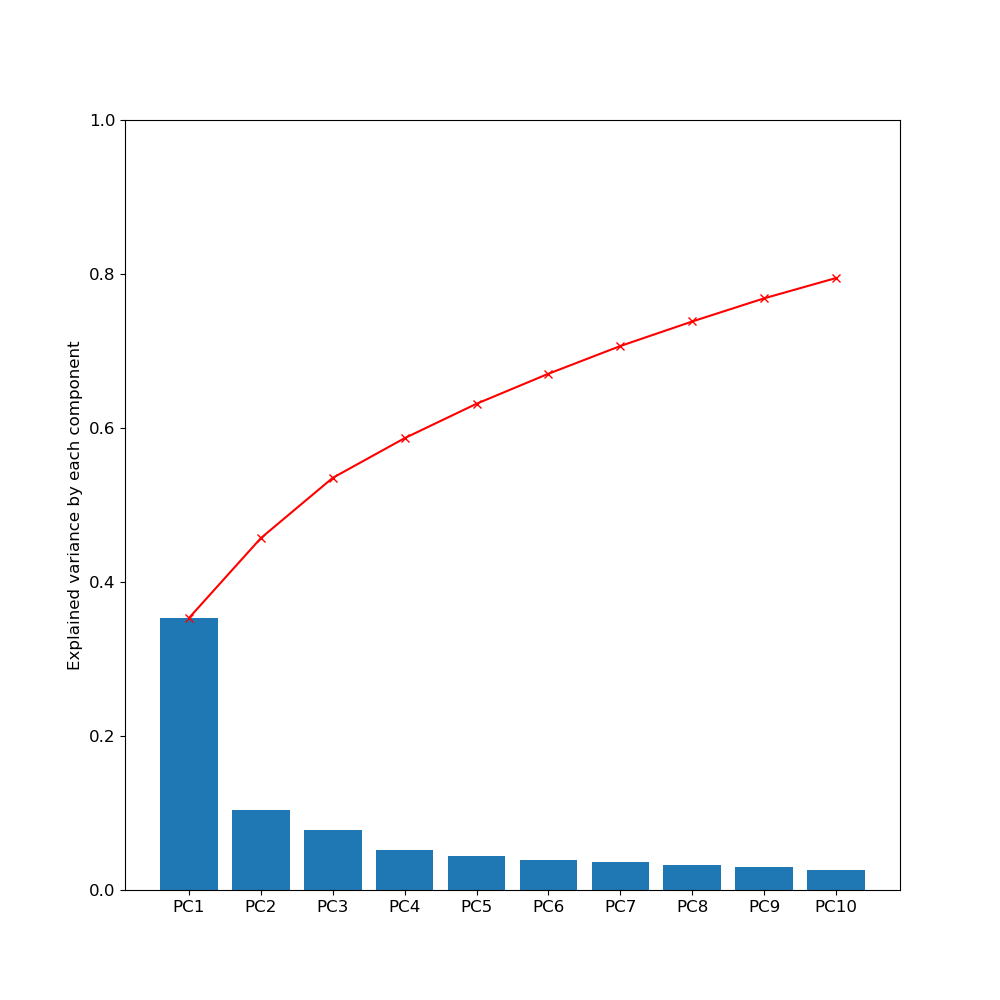

In [6]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
x_labels = ['PC{:d}'.format(x) for x in range(1,components+1)]

plt.figure(figsize=(components,components))
plt.bar(x_labels, var_exp)
plt.ylim(0, 1)
plt.ylabel("Explained variance by each component")
plt.plot(x_labels, cum_var_exp, 'xr-');

## Plotting function

In [7]:
def plotPCA(divider):
    ranks = data['L-Rank']
    targets = (ranks <= divider)
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('PC1', fontsize = 15)
    ax.set_ylabel('PC2', fontsize = 15)
    ax.set_zlabel('PC3', fontsize = 15)
    ax.set_title("Divider: " + str(divider) , fontsize = 20)
    for target,color in zip([True,False],['r','g']):
        indicesToKeep = (targets == target)
        ax.scatter(X_pca.loc[indicesToKeep, 'PC1'], 
                   X_pca.loc[indicesToKeep, 'PC2'],
                   X_pca.loc[indicesToKeep, 'PC3'],
                   c = color, s = 50)
    ax.legend([True,False]);
    ax.grid();

## Divider Plot

<IPython.core.display.Javascript object>


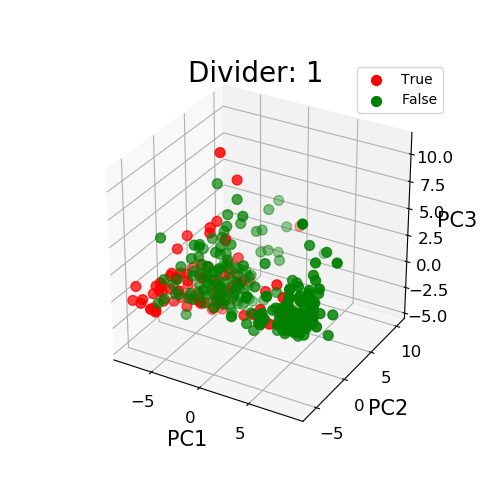

<IPython.core.display.Javascript object>


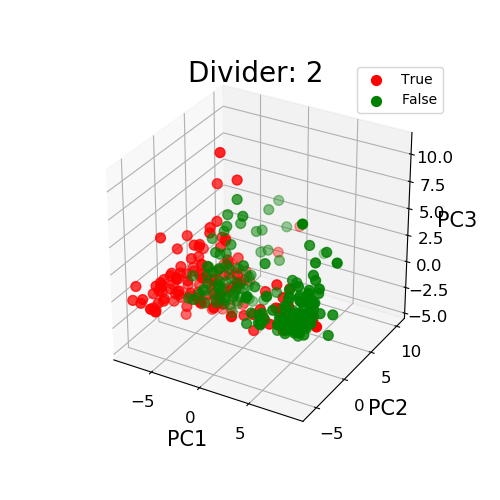

<IPython.core.display.Javascript object>


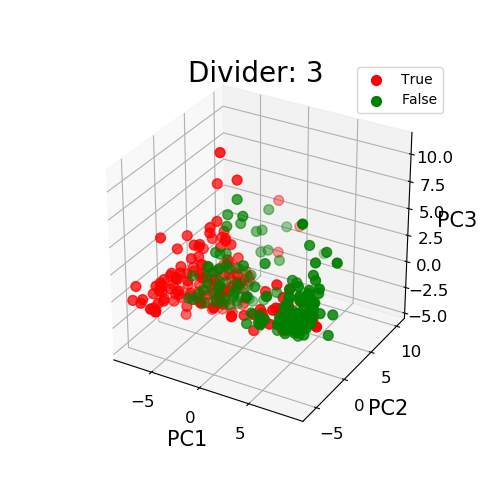

<IPython.core.display.Javascript object>


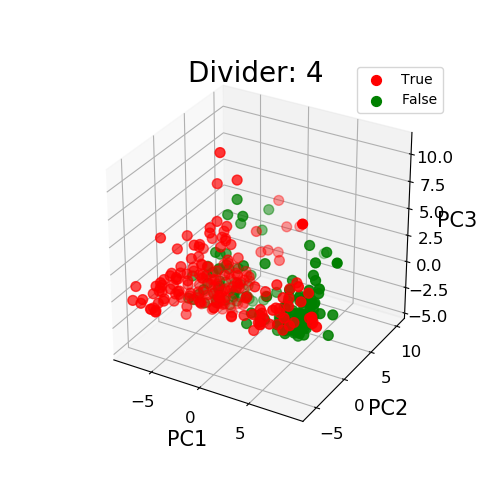

<IPython.core.display.Javascript object>


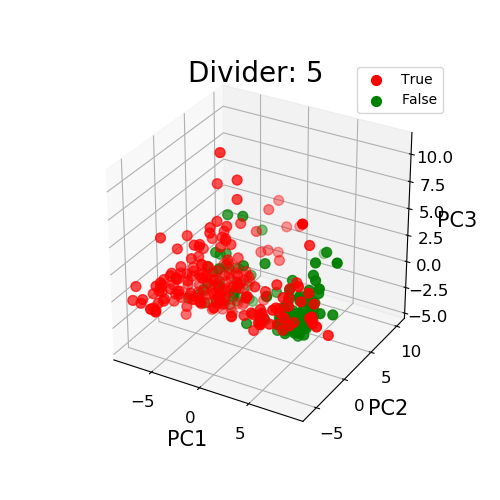

<IPython.core.display.Javascript object>


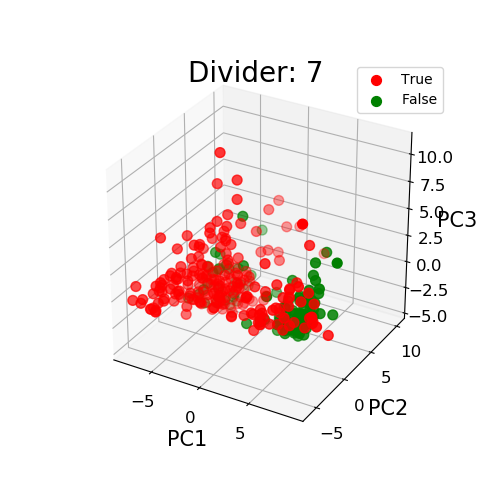

<IPython.core.display.Javascript object>


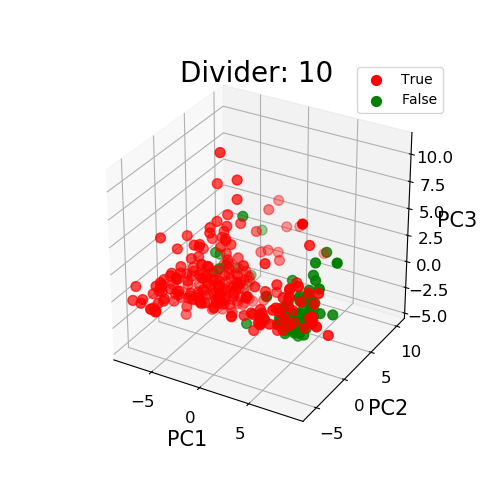

<IPython.core.display.Javascript object>


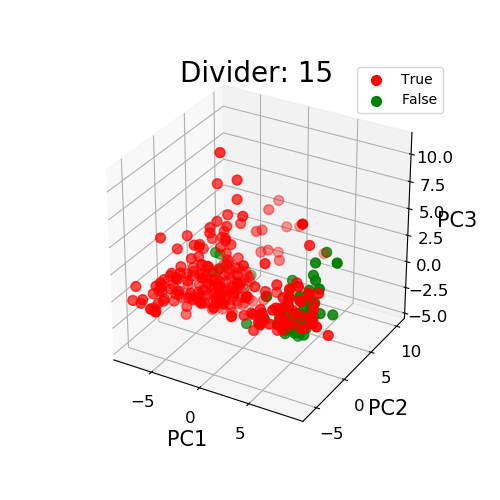

<IPython.core.display.Javascript object>


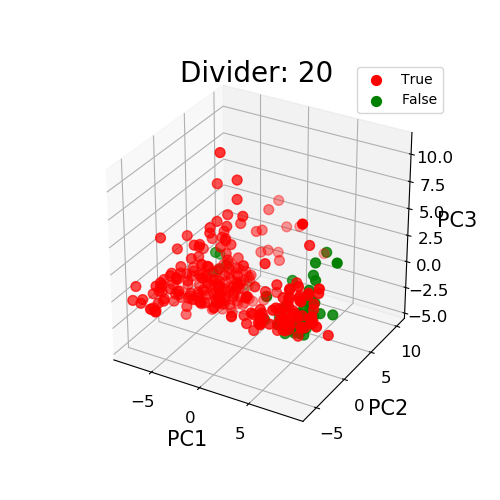

<IPython.core.display.Javascript object>


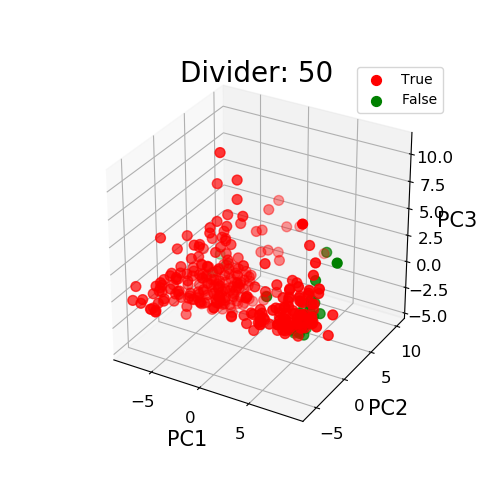

<IPython.core.display.Javascript object>


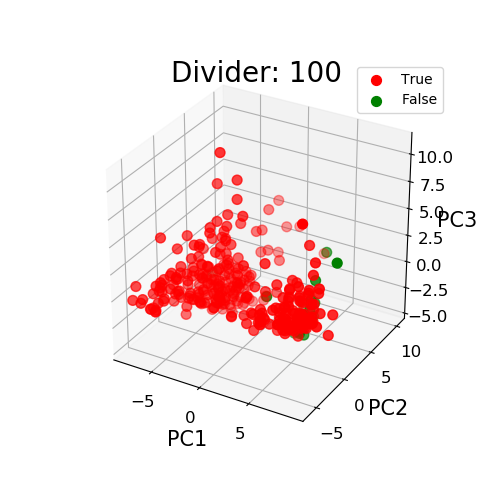

In [8]:
for divider in [1,2,3,4,5,7,10,15,20,50,100]:
    plotPCA(divider);

<IPython.core.display.Javascript object>


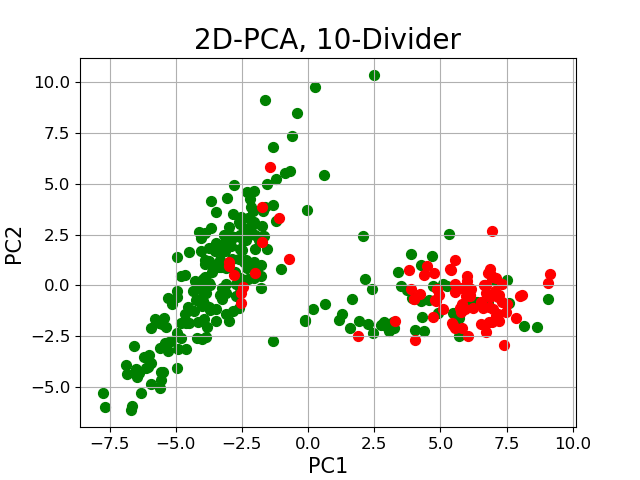

In [12]:
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('2D-PCA, 10-Divider', fontsize = 20)
ranks = data['L-Rank']
divider_labels = (ranks <= 10)
plt.scatter(X_pca['PC1'][divider_labels == True], 
            X_pca['PC2'][divider_labels == True],
            c = 'g', s = 50);
plt.scatter(X_pca['PC1'][divider_labels == False], 
            X_pca['PC2'][divider_labels == False],
            c = 'r', s = 50);
plt.grid();
plt.show()

# Inverse rank plots

<IPython.core.display.Javascript object>


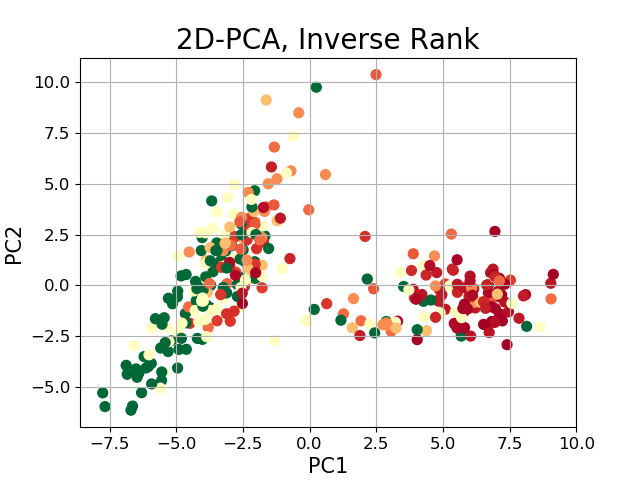

In [13]:
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('2D-PCA, Inverse Rank', fontsize = 20)
plt.scatter(X_pca['PC1'], X_pca['PC2'], c = data['L-Inverse'], s = 50, cmap='RdYlGn');
plt.grid()

<IPython.core.display.Javascript object>


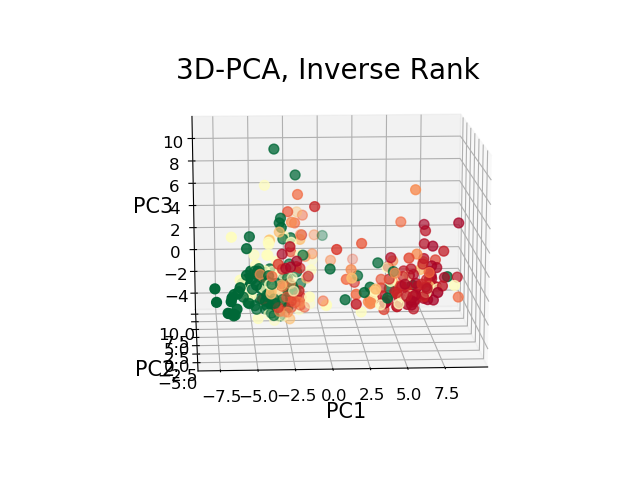

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('3D-PCA, Inverse Rank', fontsize = 20)
targets = y.unique()
ax.scatter(X_pca['PC1'], 
            X_pca['PC2'],
            X_pca['PC3'],
            c = data['L-Inverse'], s = 50, cmap='RdYlGn')
ax.grid();

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def createTestSet(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = MinMaxScaler()
    X_train = getScaledDataset(X_train)
    X_test = getScaledDataset(X_test)
    return (X_train, X_test, y_train, y_test)

def getScaledDataset(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

In [26]:
from sklearn.naive_bayes import GaussianNB

X = X_pca[["PC{:d}".format(i) for i in range(1,5)]]

reps=5000

sumScore = 0
for i in range(0,reps):
    X_train, X_test, y_train, y_test = createTestSet(X,y)

    gc= GaussianNB()
    gc.fit(X_train, y_train)
    sumScore += gc.score(X_test, y_test)

print("Average score on test set with {:d} repetitions:".format(reps))
print(sumScore/reps)

Average score on test set with 5000 repetitions:
0.8319582089552138


<IPython.core.display.Javascript object>


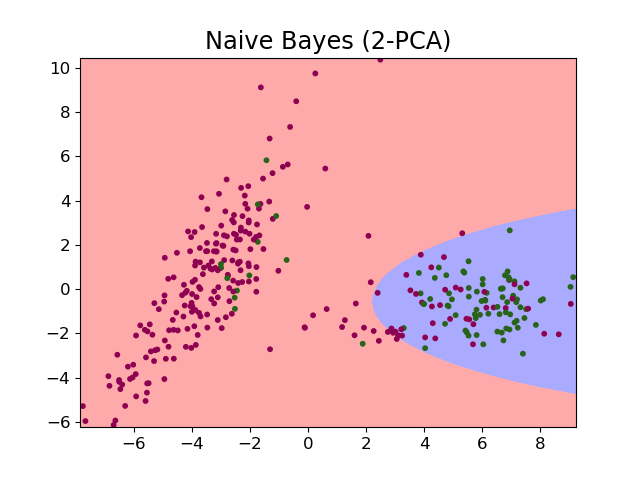

In [27]:
from matplotlib.colors import ListedColormap

X = X_pca[["PC{:d}".format(i) for i in range(1,3)]].values
h = 0.005
border = 0.1

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

gc = GaussianNB()
gc.fit(X, y)

x_min, x_max = X[:, 0].min() - border, X[:, 0].max() + border
y_min, y_max = X[:, 1].min() - border, X[:, 1].max() + border
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = gc.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes (2-PCA)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PiYG, s=10);

In [17]:
from sklearn.svm import SVC

X = X_pca[["PC{:d}".format(i) for i in range(1,5)]]

reps=5000

sumScore = 0
for i in range(0,reps):
    X_train, X_test, y_train, y_test = createTestSet(X,y)

    gc= SVC(kernel='rbf', C=1.4, gamma=9.3)
    gc.fit(X_train, y_train)
    sumScore += gc.score(X_test, y_test)

print("Average score on test set with {:d} repetitions:".format(reps))
print(sumScore/reps)

Average score on test set with 5000 repetitions:
0.8424776119402886


In [31]:
from sklearn.neighbors import KNeighborsClassifier

X = X_pca[["PC{:d}".format(i) for i in range(1,5)]]

reps=5000

sumScore = 0
for i in range(0,reps):
    X_train, X_test, y_train, y_test = createTestSet(X,y)

    gc= KNeighborsClassifier(15)
    gc.fit(X_train, y_train)
    sumScore += gc.score(X_test, y_test)

print("Average score on test set with {:d} repetitions:".format(reps))
print(sumScore/reps)

Average score on test set with 5000 repetitions:
0.8490477611940214


In [32]:
from sklearn.linear_model import LogisticRegression

X = X_pca[["PC{:d}".format(i) for i in range(1,5)]]

reps=5000

sumScore = 0
for i in range(0,reps):
    X_train, X_test, y_train, y_test = createTestSet(X,y)

    gc= LogisticRegression(C=3.7)
    gc.fit(X_train, y_train)
    sumScore += gc.score(X_test, y_test)

print("Average score on test set with {:d} repetitions:".format(reps))
print(sumScore/reps)

Average score on test set with 5000 repetitions:
0.8510268656716357


In [33]:
from sklearn.tree import DecisionTreeClassifier

X = X_pca[["PC{:d}".format(i) for i in range(1,5)]]

reps=5000

sumScore = 0
for i in range(0,reps):
    X_train, X_test, y_train, y_test = createTestSet(X,y)

    gc= DecisionTreeClassifier(max_depth=2, min_samples_leaf = 50)
    gc.fit(X_train, y_train)
    sumScore += gc.score(X_test, y_test)

print("Average score on test set with {:d} repetitions:".format(reps))
print(sumScore/reps)

Average score on test set with 5000 repetitions:
0.8517611940298407
